# Assignment 4 - Unsupervised Learning and Neural Networks

## *Yiran Chen*
Netid: yc390

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

In [49]:
import warnings
warnings.filterwarnings('ignore')
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from tqdm import tqdm,trange

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

In [90]:
# (a)
def kmeans(X, k, max_steps=100, convergence_threshold=1e-3):
    '''kmeans
    
        Input:
            X: matrix of input data where each row represents a sample
            k: number of means to use
            max_steps: maximum number of iterations to run the algorithm
            convergence_threshold: if the means change less than this
                                   value in an iteration, declare convergence
        Output:
            means: a matrix listing the k means
            cluster_assignment: a list of the cluster assignments for each samples
            dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
    '''
    #np.random.seed(100) # test with seed
    
    means = X[np.random.choice(X.shape[0], k, replace=False)]
    count = 0
    means_diff = 1
    
    while (means_diff > convergence_threshold):

        # initialize
        cluster_assignment = []
        class_dic = {} # {class:point list}
        for i in range(k):
            class_dic[i]=[]
            
        for pt in X:
            # for each point, calculate distance between this point and each mean
            dist_l = [np.linalg.norm(pt - mean) for mean in means]

            # obtain class assignment (index) from minimum distance
            classi = dist_l.index(min(dist_l))

            # add class assignment to class_assignment list
            cluster_assignment.append(classi)

            # add this point to point list(value) of class(key) in class_dic
            class_dic[classi].append(pt)
            pass
        
        count += 1 # update iteration count
        pre_means = np.copy(means) # store previous means
        # update new means: average cluster points to calculate new means
        for i in range(means.shape[0]):
            means[i] = np.average(class_dic[i], axis=0)
        
        # calculate the means change
        means_diff = np.max(np.linalg.norm(means - pre_means, axis=1))

        # break the loop if iteration count exceeds max_steps
        if count > max_steps:
            break
        
        pass
        
    # calculate SSE of Euclidean distance from each point to the cluster mean
    dissimilarity = 0
    for i, pt in enumerate(X):
        dissimilarity += np.square(np.linalg.norm(pt - means[cluster_assignment[i]]))
    

    return means, cluster_assignment, dissimilarity


**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

**ANSWER**

In [91]:
# (b)
# construct cluster datasets
X1, y1 = make_blobs(n_samples=5000, n_features=2, centers=2, random_state=0)
X2, y2 = make_blobs(n_samples=5000, n_features=2, centers=5, random_state=0)

In [92]:
# initialize dissimilarity lists and k-means lists
dissimilarity_l1 = []
dissimilarity_l2 = []
kmeans_l1 = []
kmeans_l2 = []

# for each k value, calculate dissimilarity and kmeans for both datasets
for k in range(1,11):
    means1, cluster_assignment1, dissimilarity1 = kmeans(X1, k)
    means2, cluster_assignment2, dissimilarity2 = kmeans(X2, k)
    dissimilarity_l1.append(dissimilarity1)
    dissimilarity_l2.append(dissimilarity2)
    kmeans_l1.append(means1)
    kmeans_l2.append(means2)

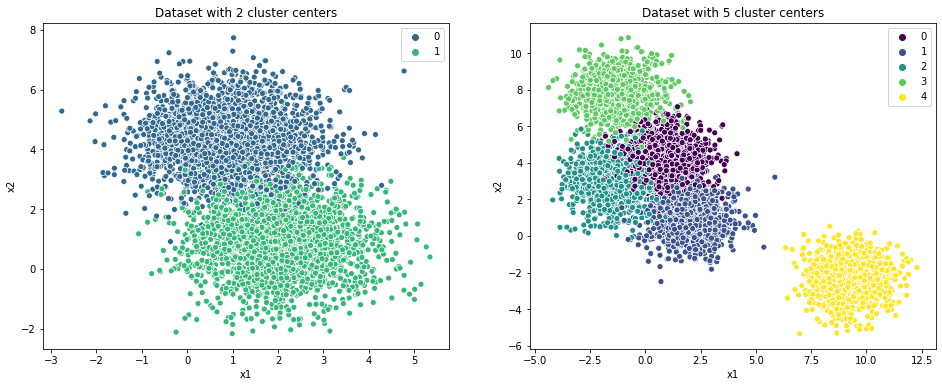

In [93]:
# visualize original created cluster datasets
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(X1[:, 0], X1[:, 1], hue=y1, palette='viridis')
plt.title('Dataset with 2 cluster centers')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1,2,2)
sns.scatterplot(X2[:, 0], X2[:, 1], hue=y2, palette='viridis',legend='full')
plt.title('Dataset with 5 cluster centers')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

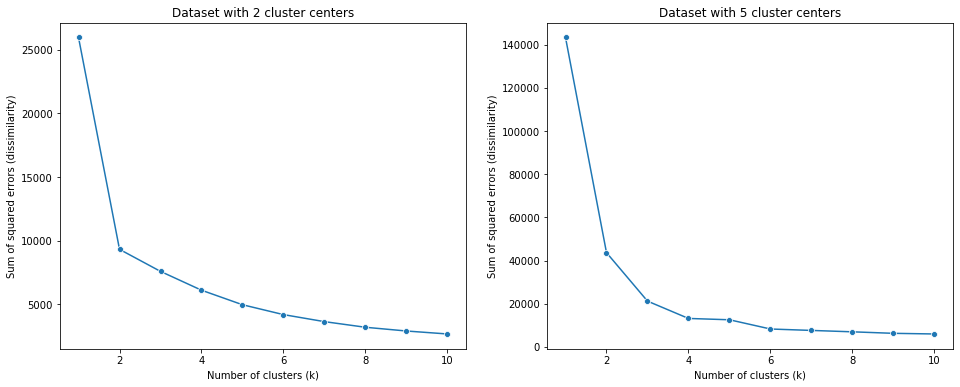

In [94]:
# plot "elbow curve" of dissimilarity for both datasets
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.lineplot(range(1,11), dissimilarity_l1, estimator=None, marker='o')
plt.title('Dataset with 2 cluster centers')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (dissimilarity)')

plt.subplot(1,2,2)
sns.lineplot(range(1,11), dissimilarity_l2, estimator=None, marker='o')
plt.title('Dataset with 5 cluster centers')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (dissimilarity)')
plt.show()

> For the first dataset with two cluster centers, the elbow in the curve is at k value of 2 as there is a sharp decrease of the slope where sum of squared errors (dissimilarity) is significantly reduced. The decrease of disimilarity is not that significant for subsequent larger k values. As we increase the number of clusters, the disimilarity line gradually flattens and has only minor decrease. This means the data points splitting to two cluster reduces dissimilarity most efficiently without overfitting. Therefore k=2 is the optimal elbow in the curve.

> For the second dataset with five cluster centers, the elbow in the curve seem to be at k value of 4. There is a sharp decrease of slope where dissimilarity is greatly reduced at k=4. There is no significant dissimilararity decrease for subsequent larger k values. The dissimilarity gradually becomes nearly constant as the number of clusters increases. This means the data points splitting to k=4 cluster reduces dissimilarity most efficiently without overfitting. However, as seen from the scatter plot, the pre-determined five clusters are not well separated with four of them sharing certain overlapping with one another. The sum of SSE of k=4 does not differ much from that of k=5 as the clusters are close to one anotehr. This might have caused the discrenpency from pre-set cluster centers and the optimal k at the elbow in the curve. 

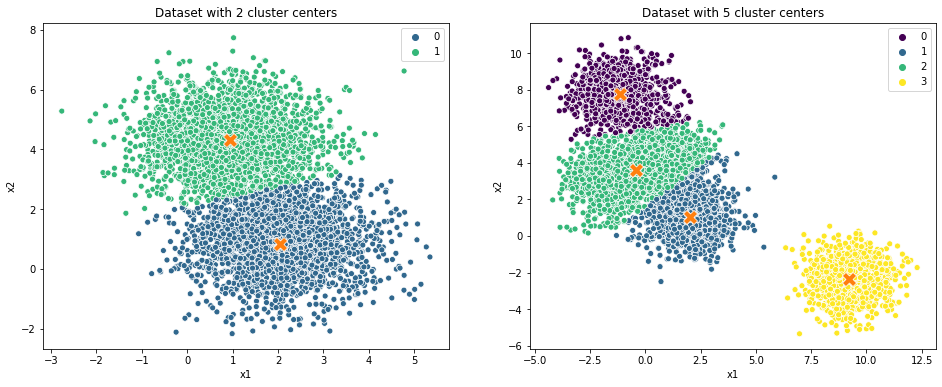

In [95]:
means1, cluster_assignment1, dissimilarity1 = kmeans(X1, k=2)
means2, cluster_assignment2, dissimilarity2 = kmeans(X2, k=4)

# Plot the data and your k-means for the optimal value of k that you determined from the elbow curve

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(X1[:, 0], X1[:, 1], hue=cluster_assignment1, palette='viridis')
sns.scatterplot(means1[:,0], means1[:,1], s=200, marker = 'X')
plt.title('Dataset with 2 cluster centers')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1,2,2)
sns.scatterplot(X2[:, 0], X2[:, 1], hue=cluster_assignment2, palette='viridis',legend='full')
sns.scatterplot(means2[:,0], means2[:,1], s=200, marker = 'X')
plt.title('Dataset with 5 cluster centers')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**(c)** </br>
**(1) K-means** </br>
K-means clustering works by iteratively minimizing sum of squared distances between each observation and the mean for each cluster. It assumes that clusters have similar variance and shapes, and struggles with non-linear boundaries, correlation or variation in variance.

**(2) Agglomerative clustering** </br>
Agglomerative clustering groups closest clusters together by setting each observation as a unique cluster and defining a measure of dissimilarity and linkage. It needs to choose where to cut the dendrogram, and struggles with correlation or small intercluster distances.

**(3) Gaussian mixture models** </br>
Gaussian mixture model assumes a mixture of Gaussian distributions for different clusters, estimates distribution parameters (class, mean and variance) by maximizing the likelihood of the data given, then picks the cluster for most likely cluster for each observation. It can produce soft clustering with estimation of data distribution and handles variation in cluster variance well but struggles when un-Gaussians clusters.

**(4) DBSCAN** </br>
DBSCAN labels core and border points, groups neighboring core points and adds border points that are neighbors of core points to search for high and low density areas. It makes no assumption about cluster shapes and is robust to outliers or noise, however, it cannot handle large variation in cluster density.

**(5) Spectral clustering** </br>
Spectral clustering builds an affinity matrix of the data points, extracts principle components to reduce dimensionality, and then remap those vectors into lower dimension for normal clustering. It focuses on connectedness instead of compactness.

In [83]:
# (d)
data_l = []
dataname_l = ['Aggregation.txt','Compound.txt','D31.txt','jain.txt']
for name in dataname_l:
    X = np.loadtxt(name)[:,0:2]
    data_l.append(X)

In [3]:
# paramter tuning in each model to achieve better performance for each dataset

dic = {'KMeans':{'Aggregation.txt':{'n_clusters':6, 'random_state':0, 'n_init':10}, 
                 'Compound.txt':{'n_clusters':5, 'random_state':0, 'n_init':10}, 
                 'D31.txt':{'n_clusters':30, 'random_state':0, 'n_init':10}, 
                 'jain.txt':{'n_clusters':2, 'random_state':0, 'n_init':10}},
       
       'AgglomerativeClustering':{'Aggregation.txt':{'n_clusters':7, 'linkage':'average'}, 
                                 'Compound.txt':{'n_clusters':6, 'linkage':'average'}, 
                                 'D31.txt':{'n_clusters':30,'linkage':'average'}, 
                                 'jain.txt':{'n_clusters':2, 'linkage':'average'}},
       
       'GaussianMixture':{'Aggregation.txt':{'n_components':7, 'n_init':10, 'random_state':0}, 
                         'Compound.txt':{'n_components':6, 'n_init':10, 'random_state':0, 'covariance_type':'spherical'}, 
                         'D31.txt':{'n_components':30, 'n_init':10, 'random_state':0}, 
                         'jain.txt':{'n_components':2, 'n_init':10, 'random_state':0}},
       
       'DBSCAN':{'Aggregation.txt':{'eps':2, 'min_samples':3},
                'Compound.txt':{'eps':1.8, 'min_samples':6},
                'D31.txt':{'eps':0.3, 'min_samples':3},
                'jain.txt':{'eps':2, 'min_samples':3}},
       
       'SpectralClustering':{'Aggregation.txt':{'n_clusters':7, 'random_state':0}, 
                             'Compound.txt':{'n_clusters':6, 'random_state':0}, 
                             'D31.txt':{'n_clusters':30, 'random_state':0}, 
                             'jain.txt':{'n_clusters':2, 'random_state':0}}}


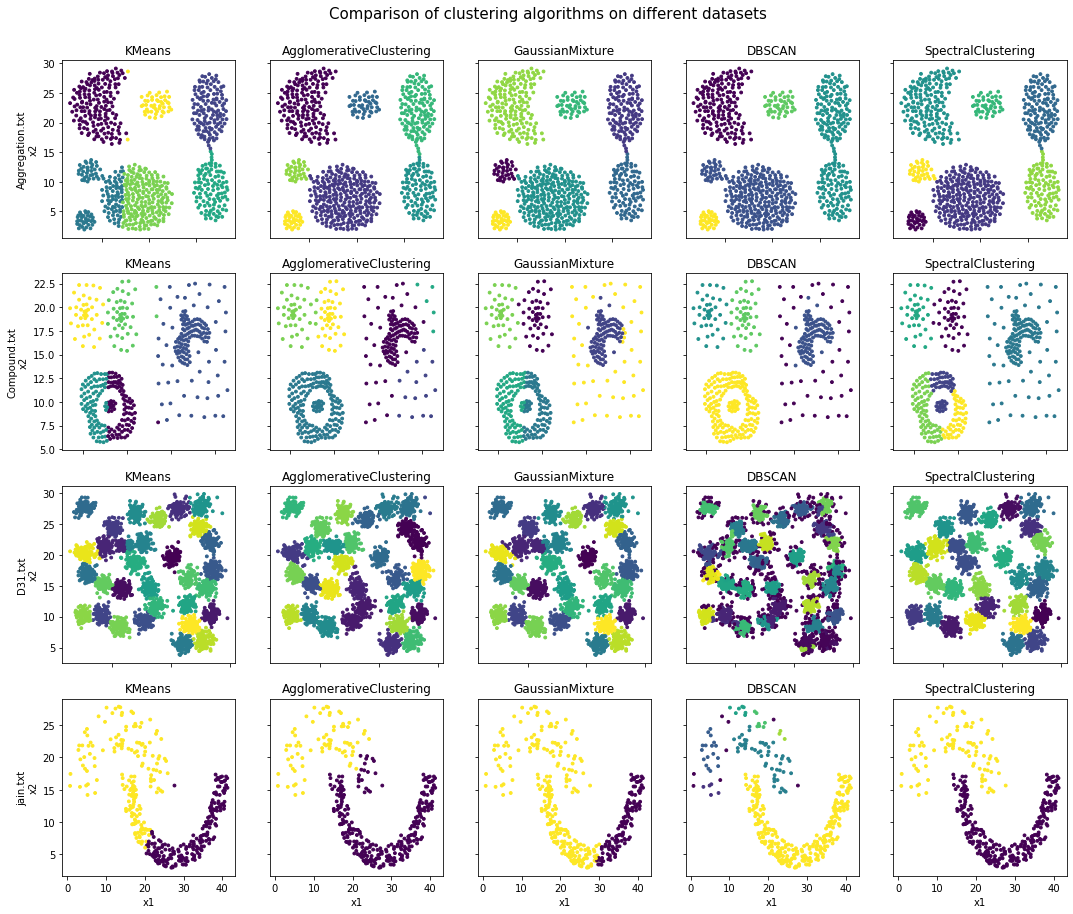

In [4]:
# plot resulting clustering of each method on each dataset

nrows, ncols = 4, 5
fig, axs = plt.subplots(nrows, ncols, figsize=(18,15))
fig.suptitle('Comparison of clustering algorithms on different datasets',
             ha='center',y=0.93, fontsize=15)

for i in range(nrows):
    for j in range(ncols):
        arg = dic[list(dic.keys())[j]][dataname_l[i]]
        cluster = eval(list(dic.keys())[j])(**arg)
        labels = cluster.fit_predict(data_l[i])
        axs[i,j].scatter(data_l[i][:, 0], data_l[i][:, 1],c=labels,s=8, cmap='viridis')
        axs[i,j].set_title(list(dic.keys())[j])
        axs[i,j].set_ylabel(dataname_l[i]+'\nx2')
        
for ax in axs.flat:
    ax.set(xlabel='x1')
    ax.label_outer()


**(d)**

For `Aggregation.txt`, agglomerative clustering, Gaussian mixture model, and spectral clustering work the best with clear separations while K-means works the worst. K-means struggles at identifying clusters with varying shapes and variances in this case. On the other hand, Gaussian mixture model excels with variation in cluster vairance and each cluster being approximately Gaussian distributed. Agglomerative clustering can distinguish clusters from bottom up and performs well here when clusters are well-separated.

For `Compound.txt`, DBSCAN works relatively better while all the other methods do not seem to perform well. Here DBSCAN can identify the clusters with varying shapes and variances. However, it cannot handle significant variation in cluster density and failed to correctly classify for the bottom left cornor with concentric circles and the right part where center is concentrated and surroundings are sparsely distributed. The data neither fits k-means' assumption that clusters share similar shapes and variances, nor it fits Gaussian mixture model assumption that each cluster can be approximated as Gaussian distribution. Here agglomerative clustering struggles to separate the bottom left cornor of concentraic circles and the right part where the intercluster distance is not sufficient to distinguish them. 

For `D31.txt`, k-means, agglomerative clustering, Gaussian mixture model and spectral clustering all work well at classifying the 30 small clusters as they share similar circular shapes and varainces, while DBSCAN performs the worst. As the large number of blobs cluster very close to each other, DBSCAN has difficulty separating such nearby clusters with varying densities.

For `jain.txt`, spectral clustering works the best while all the other methods fail to have clear separation between the two moons. Contrary to k-means' false assumption that clusters share similar shapes and variances or Gaussian mixture model's assumption that each cluster has a Gaussian distribution, spectral clustering does not assume clusters to be any shape or distribution and therefore can perform well using connetedness (affinity matrix) of points instead of compactness. DBSCAN does not perform well as the density of two moons vary from one another.


## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWER**

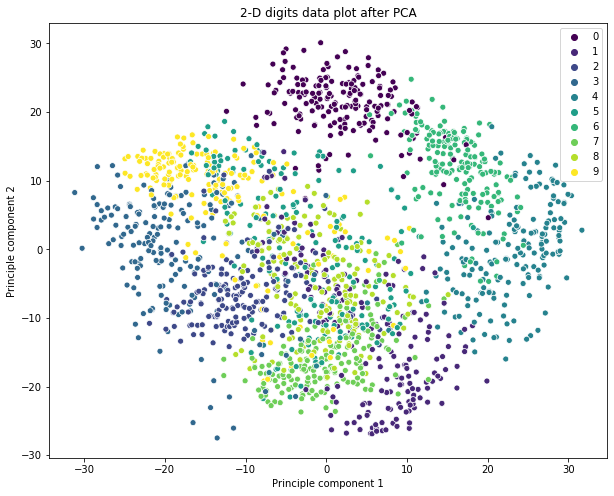

In [547]:
# (a)
# load sklearn digits dataset
digits = load_digits()

# apply pca to reduce into 2-D space
pca =  PCA(n_components=2)
digits_pca = pca.fit_transform(digits['data'])

# plot the data with labels in the 2-D space
plt.figure(figsize=(10,8))
sns.scatterplot(digits_pca[:,0], digits_pca[:,1], 
                hue=digits['target'], palette='viridis', legend='full')
plt.title('2-D digits data plot after PCA')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()

Fraction of variance that is unexplained by the first two principal components: 0.7149


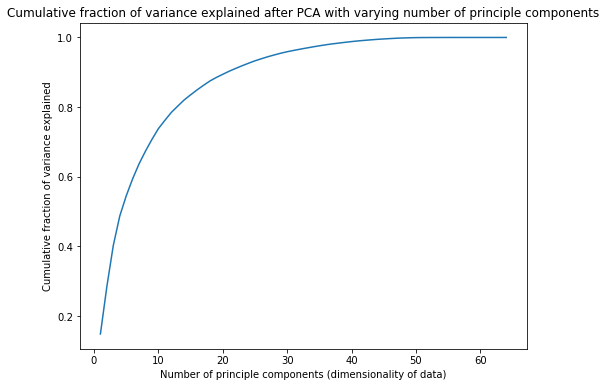

In [583]:
# plot cumulative fraction of variance explained

D = digits['data'].shape[1]
for i in range(1, D+1):
    pca =  PCA(n_components=i)
    digits_pca = pca.fit(digits['data'])

    # calculate variance ratios
    variance = digits_pca.explained_variance_ratio_

    # cumulative sum of variance explained with [i] features
    var=np.cumsum(digits_pca.explained_variance_ratio_)
    
    if i==2:
        print(f'Fraction of variance that is unexplained by the first two principal components: {1-var[-1]:.4f}')
        continue

plt.figure(figsize=(8,6))
plt.plot(range(1,D+1), var)
plt.title('Cumulative fraction of variance explained after PCA with varying number of principle components')
plt.xlabel('Number of principle components (dimensionality of data)')
plt.ylabel('Cumulative fraction of variance explained')
plt.show()

**(b)**
71.5% of variance in the data is unexplained by the first two principal components. It can be seen that two principle componets can only account for around 29.5% of the total variance, suggesting we are losing most of the essential characteristics of the data by reducing dimentionality to two. The would lead to worse clustering of the data as information is lost during the process and the clusters are not as distinctively different from one another as they were before dimentsionality reduction. 


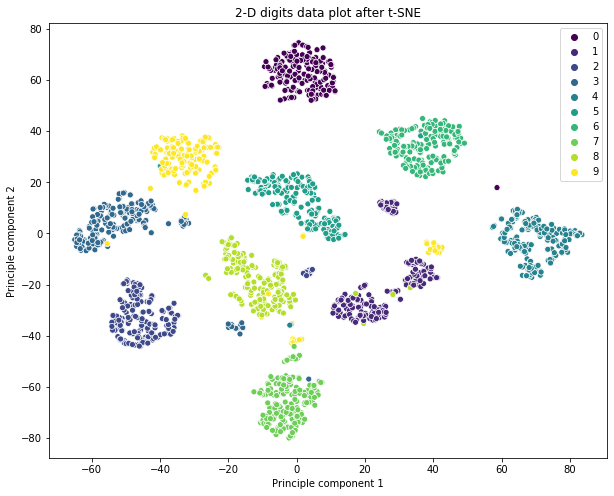

In [590]:
# (c) reduce dimensionality with t-SNE for data visualization

tsne = TSNE(n_components=2, random_state=0, perplexity=20, init="pca")
digits_tsne = tsne.fit_transform(digits.data)

# plot the data with labels in the 2-D space
plt.figure(figsize=(10,8))
sns.scatterplot(digits_tsne[:,0], digits_tsne[:,1], 
                hue=digits['target'], palette='viridis', legend='full')
plt.title('2-D digits data plot after t-SNE')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()

**(d)**
t-Distributed Stochastic Neighbor Embedding (t-SNE) seems to cluster the data better than PCA with much clearer clustering with much less overlapping areas. It is able to seperate clusters better by using non-linear algorithm based on probability and adapts to the underlying data to minimize difference between similarities of points in high- and low-dimensional space. On the other hand, PCA is a linear feature extraction technique by maximizing variance explained of the data in the low-dimensional representation. It can only capture linear structures in the data, while t-SNE can capture non-linearity and perserve the distance information from high dimension mapping to low dimensional space.


## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

**ANSWER**

In [3]:
import numpy as np
# (a)
class myNeuralNetwork(object):
    
    def __init__(self, n_in=2, n_layer1=5, n_layer2=5, n_out=1, learning_rate=1e-2):
        '''__init__
        Class constructor: Initialize the parameters of the network including
        the learning rate, layer sizes, and each of the parameters
        of the model (weights, placeholders for activations, inputs, 
        deltas for gradients, and weight gradients). This method
        should also initialize the weights of your model randomly
            Input:
                n_in:          number of inputs
                n_layer1:      number of nodes in layer 1
                n_layer2:      number of nodes in layer 2
                n_out:         number of output nodes
                learning_rate: learning rate for gradient descent
            Output:
                none
        '''
        np.random.seed(123)
        
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.learning_rate = learning_rate
        self.w1, self.w2, self.w3 = [np.random.randn(y, x)
                                     for x, y in zip([n_in, n_layer1, n_layer2], 
                                                     [n_layer1, n_layer2, n_out])]
            
    def forward_propagation(self, x):
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data represening 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
        '''   
        self.a1 = x @ self.w1.T
        self.z1 = self.sigmoid(self.a1)
        
        self.a2 = self.z1 @ self.w2.T
        self.z2 = self.sigmoid(self.a2)        

        self.a3 = self.z2 @ self.w3.T
        self.z3 = self.sigmoid(self.a3)        
    
        return self.z3
        
        
    def compute_loss(self, X, y):
        '''compute_loss
        Computes the current loss/cost function of the neural network
        based on the weights and the data input into this function.
        To do so, it runs the X data through the network to generate
        predictions, then compares it to the target variable y using
        the cost/loss function
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                loss: a scalar measure of loss/cost
        '''
        loss = 0
        for i in range(len(y)):
            y_hat = self.forward_propagation(X[i])
            loss += 0.5 * np.sum(np.square(y_hat - y[i]))
            
        return loss
        
        
    def backpropagate(self, x, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss function of the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of the loss/cost associated with x,y
                      and the current model weights
        '''
        y_hat = self.forward_propagation(x)
        
        self.delta3 = (y_hat - y) * self.sigmoid_derivative(self.a3)
        self.dedw3 = np.outer(self.delta3, self.z2)
        
        self.delta2 = (self.delta3 @ self.w3) * self.sigmoid_derivative(self.a2)
        self.dedw2 = np.outer(self.delta2, self.z1)

        self.delta1 = (self.delta2 @ self.w2) * self.sigmoid_derivative(self.a1)
        self.dedx = np.outer(self.delta1, x)
        
        loss = np.sum(np.square(y_hat - y))/2
        
        return loss

    
    def stochastic_gradient_descent_step(self):
        '''stochastic_gradient_descent_step
        Using the gradient values computer by backpropagate, update each
        weight value of the model according to the familiar stochastic
        gradient descent update equation.
        
        Input: none
        Output: none
        '''
        # update each weight
        self.w3 -= self.dedw3 * self.learning_rate
        self.w2 -= self.dedw2 * self.learning_rate
        self.w1 -= self.dedx * self.learning_rate
        
        
    def fit(self, X, y, X_val=None, y_val=None, max_epochs=2000, learning_rate=1e-2, get_validation_loss=False):
        '''fit
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                training_loss:   Vector of training loss values at the end of each epoch
                validation_loss: Vector of validation loss values at the end of each epoch
                                 [optional output if get_validation_loss==True]
        '''
        
        self.learning_rate = learning_rate
        training_loss = np.zeros((max_epochs, 1))
        validation_loss = np.zeros((max_epochs, 1))
            
        for epoch in range(max_epochs):
            # random shuffle training data for each epoch
            shuffle = np.arange(len(y))
            np.random.shuffle(shuffle)
            X = X[shuffle]
            y = y[shuffle]
            
            train_loss = 0
            for i in range(len(y)):
                train_loss += self.backpropagate(X[i], y[i])
                self.stochastic_gradient_descent_step()
            training_loss[epoch] = train_loss/len(y)
            #print(f'epoch{epoch}',train_loss)
            
            # if validation set exists
            if get_validation_loss:
                val_loss = 0
                val_loss = self.compute_loss(X_val, y_val) 
                validation_loss[epoch] = val_loss/len(y_val)
        
        return training_loss, validation_loss
        
        
    def predict_proba(self, X):
        '''predict_proba
        Compute the output of the neural network for each sample in X, with the last layer's
        sigmoid activation providing an estimate of the target output between 0 and 1
            Input:
                X: A matrix of N samples of data [N x n_in]
            Output:
                y_hat: A vector of class predictions between 0 and 1 [N x 1]
        '''
        y_hat = np.zeros((X.shape[0],1))
        for i in range(len(X)):
            y_hat[i] = self.forward_propagation(X[i])
        return y_hat
        
        
    def predict(self, X, decision_thresh=0.5):
        '''predict
        Compute the output of the neural network prediction for 
        each sample in X, with the last layer's sigmoid activation 
        providing an estimate of the target output between 0 and 1, 
        then thresholding that prediction based on decision_thresh
        to produce a binary class prediction
            Input:
                X: A matrix of N samples of data [N x n_in]
                decision_threshold: threshold for the class confidence score
                                    of predict_proba for binarizing the output
            Output:
                y_hat: A vector of class predictions of either 0 or 1 [N x 1]
        '''
        y_hat = np.zeros((X.shape[0],1))
        for i in range(len(X)):
            y_hat[i] = np.where(self.predict_proba(X[i]) > decision_thresh, 1, 0)
        return y_hat
    
        
    def sigmoid(self, X):
        '''sigmoid
        Compute the sigmoid function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid function
        '''
        X_sigmoid = 1/(1+np.exp(-X))
        return X_sigmoid
    
    
    def sigmoid_derivative(self, X):
        '''sigmoid_derivative
        Compute the sigmoid derivative function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid derivative function
        '''
        X_siged = self.sigmoid(X)
        X_sigmoid = X_siged * (1-X_siged)
        return X_sigmoid

In [4]:
# (b)
# create dataset 
X, y = make_moons(n_samples=600, noise=0.2)

# add bias term
X = np.column_stack((np.ones(len(X)),X))

In [5]:
# split into training and test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.166, random_state=123)

In [6]:
# add one input node as bias
myNN = myNeuralNetwork(n_in=3, n_layer1=5, n_layer2=5, n_out=1, learning_rate=1e-2)

In [7]:
# fitting to my neural network
training_loss, validation_loss = myNN.fit(X_train, y_train, X_val, y_val, max_epochs=3000, learning_rate=1e-2, get_validation_loss=True)

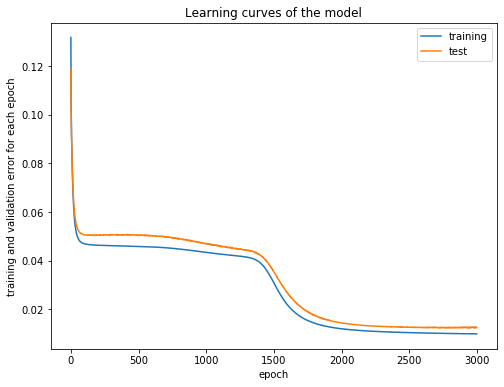

In [8]:
# plot learning curves (training and validation error for each epoch of stochastic gradient descent
# where an epoch represents having trained on each of the training samples one time)

plt.figure(figsize=(8,6))
plt.title('Learning curves of the model')
plt.plot(training_loss, label='training')
plt.plot(validation_loss, label='test')
plt.xlabel('epoch')
plt.ylabel('training and validation error for each epoch')
plt.legend()
plt.show()

In [9]:
# In two subplots, plot the training data on one subplot, and the validation data on the other subplot. 
# On each plot, plot the decision boundary from your neural network trained on the training data

nvalues = 500
x1values = np.linspace(X_train[:,1].min()-1,X_train[:,1].max()+1,nvalues)
x2values = np.linspace(X_train[:,2].min()-1,X_train[:,2].max()+1,nvalues)
XX1, XX2 = np.meshgrid(x1values, x2values, indexing='ij')
grid = np.array([np.ones(len(XX1.ravel())), XX1.ravel(), XX2.ravel()]).T

grid_pred = myNN.predict_proba(grid)

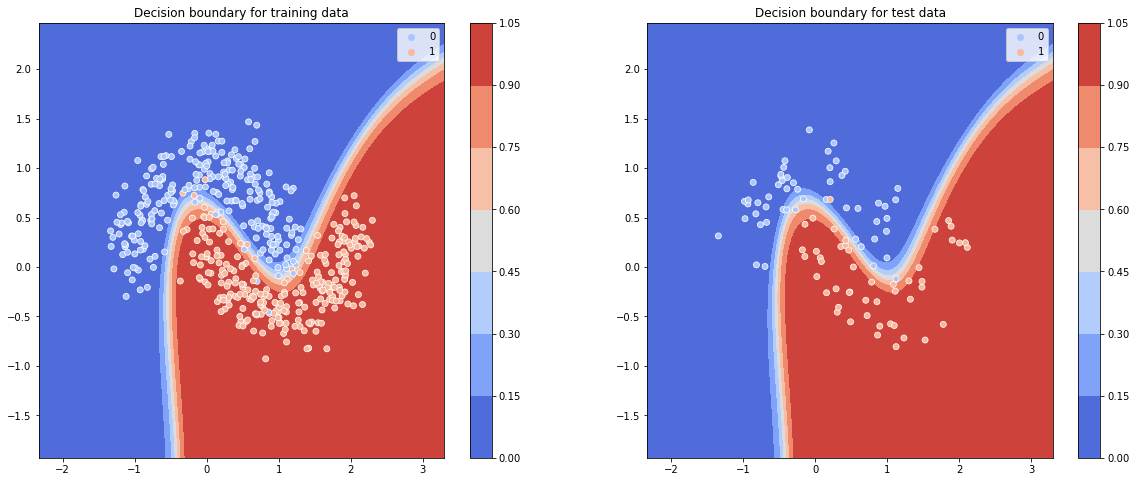

In [10]:
# for training data
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.contourf(XX1, XX2, grid_pred.reshape(XX1.shape), cmap='coolwarm')
sns.scatterplot(X_train[:,1],X_train[:,2], hue=y_train, palette='coolwarm')
plt.colorbar()
plt.title('Decision boundary for training data')

plt.subplot(1,2,2)
plt.contourf(XX1, XX2, grid_pred.reshape(XX1.shape), cmap='coolwarm')
sns.scatterplot(X_val[:,1], X_val[:,2], hue=y_val, palette='coolwarm')
plt.colorbar()
plt.title('Decision boundary for test data')
plt.show()

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5), activation='logistic', batch_size=1, solver='sgd', learning_rate='constant',
                    learning_rate_init=1e-2, max_iter=3000, verbose=False, random_state=12)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=1, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.01, max_iter=3000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=12, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

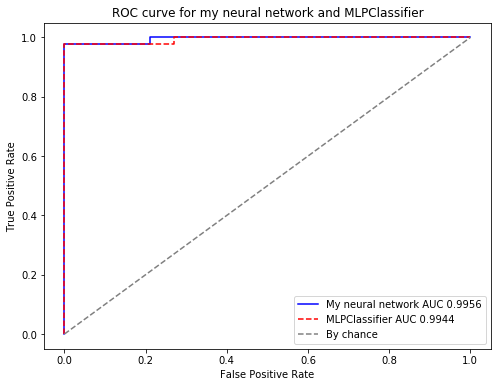

In [32]:
# Report performance on the test data with an ROC curve
plt.figure(figsize=(8,6))

y_pred_val = myNN.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_val.ravel())
auc = metrics.roc_auc_score(y_val, y_pred_val)
plt.plot(fpr, tpr, color='b', label=f'My neural network AUC {auc:.4f}')

# compare against the scikit-learn MLPClassifier trained with the same parameters
y_pred_val = mlp.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_val.ravel())
auc = metrics.roc_auc_score(y_val, y_pred_val)
plt.plot(fpr, tpr, color='r', linestyle='--', label=f'MLPClassifier AUC {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey',label='By chance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for my neural network and MLPClassifier')
plt.show()

**(c)** Suggest two ways in which you neural network implementation could be improved.

1. Regularization techniques including L1, L2 and dropouts could be added to prevent overfitting.

2. The hyperparameters including the number of hidden layers, nodes in each layer, learning rate, etc. can be further adjusted and optimized. When there are more layers or more nodes in the network, gradient vanishing problem might occur which can be mitigtaed by batch normalizaiton or using other types of activation functions (e.g. ReLu)
